## Predicting Adaptability Level of the Student in a Remote Learning Environment

### Project Scope:
During the past two years, the COVID-19 pandemic has disrupted education across the globe. In to response this highly transmissible disease, many schools adopted remote learning as the primary delivery mode. The intention was to reach all the students and ensure everyone had the chance to learn. However, there are challenges to overcome, including two-way interaction between instructor and students, availability of the technologies, and so on.

Students with different backgrounds might have a significant gap in adaptability to online learning. For example, students from developed countries (USA, Canada) have stable internet connections and devices to participate whereas the third world countries might have difficulties to have reliable internet/ devices. Therefore, some groups of people were more likely to have higher adaptability level than others.


Your Role:

Build a predictive model that answers the question: “what factors were more likely to affect students' adaptability level in remote learning environment ?” using student data (ie gender, age, financial Condition, etc).


Specifics:

Machine Learning task: Classification model

Target variable: Adaptivity level

Input variables: Refer to data dictionary below

Success Criteria: Accuracy of 80% and above


### Data Dictionary:
The dataset contains several parameters which were recorded about the students. The parameters included are :

**Gender:** Boy or Girl

**Age:** Age in range

**Education Level:** Education institution level (School, University, etc)

**Institution Type:** Government or Non-government

**IT Student:** Whether the student is studying in IT-related fields

**Location in Town:** Is student's location in town

**Load-shedding:** Level of load shedding

**Financial Condition:** Financial condition of family

**Internet Type:** Internet type used mostly in device (Cellular/ Wi-Fi)

**Network Type:** Network connectivity type (3G, 4G)

**Class Duration:** Daily class duration in hour(s)

**Self LMS:** Institution’s own Learning Management System availability

**Device:** Device used mostly in class

**Adaptivity level:** Adaptability level of the student (High, Moderate, Low)

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [25]:
df = pd.read_csv('students_adaptability_level_online_education.csv')
df.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


In [26]:
#Check the structure of the dataset including data types, number of rows, columns and non-null records.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


In [27]:
#Check if any missing values
df.isnull().sum()

Gender                 0
Age                    0
Education Level        0
Institution Type       0
IT Student             0
Location               0
Load-shedding          0
Financial Condition    0
Internet Type          0
Network Type           0
Class Duration         0
Self Lms               0
Device                 0
Adaptivity Level       0
dtype: int64

### Data Visalization
Plotting charts help us understand the dataset easily compared to the rows and columns. Let's check the dataset through various types of plots.

In [28]:
#Check the distribution of the target variable
df['Adaptivity Level'].value_counts()

Moderate    625
Low         480
High        100
Name: Adaptivity Level, dtype: int64

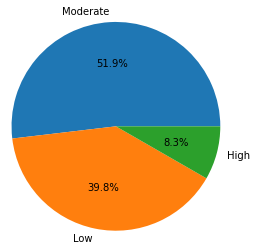

In [29]:
# plot the occurrence of different adaptivity level in the dataset
plt.pie(df['Adaptivity Level'].value_counts(), autopct = '%.1f%%', radius = 1.2, labels = ['Moderate', 'Low','High'])


# display the plot
plt.show()

**Observations**

* From the above pie plot, it can be seen that the data has a high proportion for Moderate followed by Low.The dataset is not balanced regarding the target variable

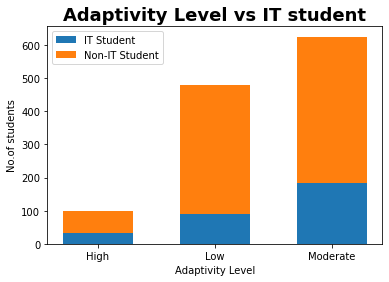

In [30]:
# See if the correlation of Adaptivity level and IT student.

w = 0.6
Num_NonIT_stud = df[df['IT Student'] == 'No'].groupby('Adaptivity Level')['IT Student'].count()
Num_IT_stud = df[df['IT Student'] == 'Yes'].groupby('Adaptivity Level')['IT Student'].count()
# Plot stacked bar chart
plt.bar(sorted(df['Adaptivity Level'].unique()), Num_IT_stud, w)
plt.bar(sorted(df['Adaptivity Level'].unique()), Num_NonIT_stud, w, Num_IT_stud)
# Display
plt.title('Adaptivity Level vs IT student', fontsize=18, fontweight='bold', color='black')
plt.xlabel('Adaptivity Level')
plt.ylabel("No.of students")
plt.legend(labels=['IT Student', 'Non-IT Student'], loc=2)
plt.show()

**Observation**
* IT and Non-IT students' adaptivity levels are Moderate, which indicates the technical background is less likely to affect the adaptivity level.
* Both share similar performance on adaptivity level with the lowest number in High and highest number in Moderate.

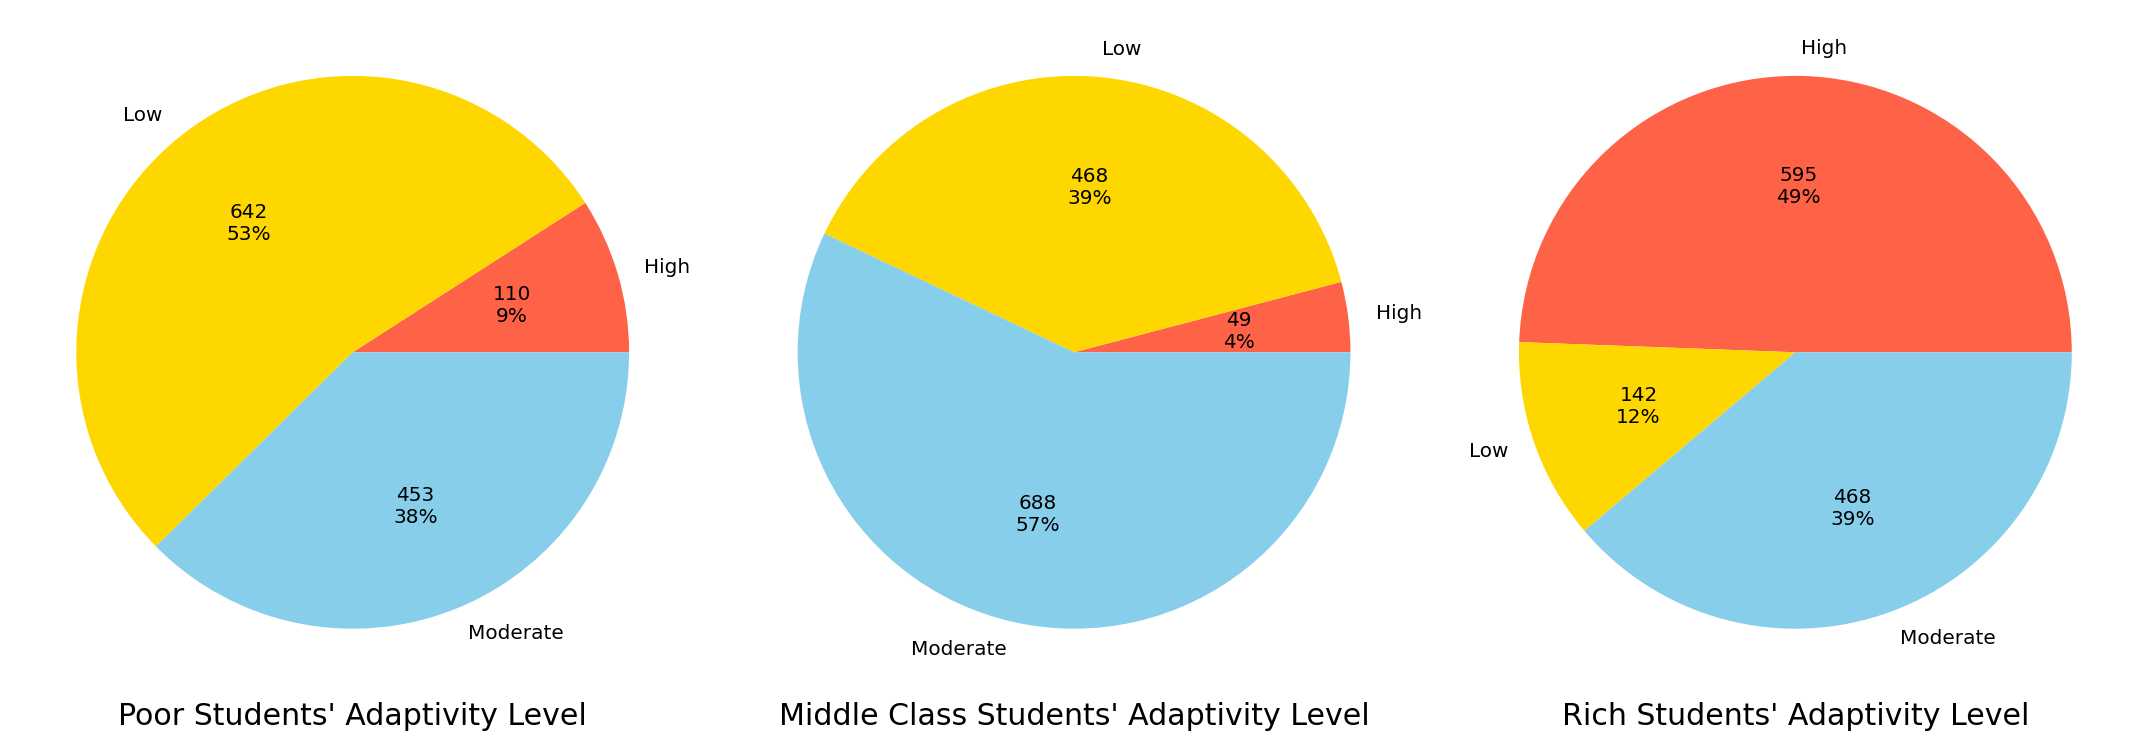

In [31]:
#Check if the Financial Condition and Adaptivity are correlated
#.set_index(Num_Diff_Financial.index // 3)['counts']
x = df['Financial Condition']

def label_function(val):
    return f'{val / 100 * len(df):.0f}\n{val:.0f}%'

Num_Poor_stud = df[x == 'Poor'].groupby('Adaptivity Level')['Financial Condition'].count()
Num_Mid_stud = df[x == 'Mid'].groupby('Adaptivity Level')['Financial Condition'].count()
Num_Rich_stud = df[x == 'Rich'].groupby('Adaptivity Level')['Financial Condition'].count()

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(30, 10))

Num_Poor_stud.plot(kind='pie', autopct=label_function, textprops={'fontsize': 20},
                                  colors=['tomato', 'gold', 'skyblue'], ax=ax1)
Num_Mid_stud.plot(kind='pie', autopct=label_function, textprops={'fontsize': 20},
                                 colors=['tomato', 'gold', 'skyblue'], ax=ax2)
Num_Rich_stud.plot(kind='pie', autopct=label_function, textprops={'fontsize': 20},
                                 colors=['tomato', 'gold', 'skyblue'], ax=ax3)

ax1.set_xlabel("Poor Students' Adaptivity Level", size=30)
ax2.set_xlabel("Middle Class Students' Adaptivity Level", size=30)
ax3.set_xlabel("Rich Students' Adaptivity Level", size=30)
ax1.set_ylabel("")
ax2.set_ylabel("")
ax3.set_ylabel("")
plt.tight_layout()
plt.show()

**Observation**
* Nearly half of the rich students perform great at adapting to online education
* Over half of the poor students have an unsatisfactory result in adapting to online education
* Financial Condition seems to have a positive correlation with Adaptivity Level

### Create Dummy Variables
Now that we finished the data exploration, it's time to build our model to predict the adaptivity mode. Most Machine Learning algorithms cannot handle text data, for example, Neural Network and Logistic Regression. Therefore, we need to create what are called dummy variables for all our categorical features.

In [32]:
#Converting the features with Values Yes or No into Numeric Binary Format.

df['IT Student'] = (df['IT Student'] == 'Yes').astype(int)
df['Location'] = (df['Location'] == 'Yes').astype(int)
df['Self Lms'] = (df['Self Lms'] == 'Yes').astype(int)

In [33]:
# Create dummy variables for all remaining 'object' type variables 
df = pd.get_dummies(df, columns=['Gender', 'Age', 'Education Level', 'Gender', 'Institution Type', 'Load-shedding', 'Financial Condition', 'Internet Type', 'Network Type', 'Class Duration', 'Device'])
pd.set_option("display.max_columns", None)

In [34]:
#Check if the dummy variable was created correctly.
df.head(2)

,IT Student,Location,Self Lms,Adaptivity Level,Gender_Boy,Gender_Girl,Age_1-5,Age_11-15,Age_16-20,Age_21-25,Age_26-30,Age_6-10,Education Level_College,Education Level_School,Education Level_University,Gender_Boy,Gender_Girl,Institution Type_Government,Institution Type_Non Government,Load-shedding_High,Load-shedding_Low,Financial Condition_Mid,Financial Condition_Poor,Financial Condition_Rich,Internet Type_Mobile Data,Internet Type_Wifi,Network Type_2G,Network Type_3G,Network Type_4G,Class Duration_0,Class Duration_1-3,Class Duration_3-6,Device_Computer,Device_Mobile,Device_Tab
0,0,1,0,Moderate,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,1
1,0,1,1,Moderate,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0


In [35]:
# It's always nice to check the tail of data to enhance the confidence that the data was transformed correctly.
df.tail(2)

,IT Student,Location,Self Lms,Adaptivity Level,Gender_Boy,Gender_Girl,Age_1-5,Age_11-15,Age_16-20,Age_21-25,Age_26-30,Age_6-10,Education Level_College,Education Level_School,Education Level_University,Gender_Boy,Gender_Girl,Institution Type_Government,Institution Type_Non Government,Load-shedding_High,Load-shedding_Low,Financial Condition_Mid,Financial Condition_Poor,Financial Condition_Rich,Internet Type_Mobile Data,Internet Type_Wifi,Network Type_2G,Network Type_3G,Network Type_4G,Class Duration_0,Class Duration_1-3,Class Duration_3-6,Device_Computer,Device_Mobile,Device_Tab
1203,0,0,0,Low,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,1,0,0,0,1,0,0,1,0,1,0,0,1,0
1204,0,1,0,Moderate,0,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0


### Data Partition

In [36]:
# Seperate the input features and target variable
x = df.drop('Adaptivity Level',axis=1)
y = df['Adaptivity Level']

In [37]:
# splitting the data in training and testing set
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=123)

In [38]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((964, 34), (241, 34), (964,), (241,))

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 35 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   IT Student                       1205 non-null   int32 
 1   Location                         1205 non-null   int32 
 2   Self Lms                         1205 non-null   int32 
 3   Adaptivity Level                 1205 non-null   object
 4   Gender_Boy                       1205 non-null   uint8 
 5   Gender_Girl                      1205 non-null   uint8 
 6   Age_1-5                          1205 non-null   uint8 
 7   Age_11-15                        1205 non-null   uint8 
 8   Age_16-20                        1205 non-null   uint8 
 9   Age_21-25                        1205 non-null   uint8 
 10  Age_26-30                        1205 non-null   uint8 
 11  Age_6-10                         1205 non-null   uint8 
 12  Education Level_College          1

In [49]:
# Before going directly into building the predictive model, comparing and evaluating different models is necessary.
# Cross-Validation used to compare and select an appropriate model.

from sklearn.model_selection import cross_val_score

# We are comparing Logistic Regression and Random Forest in this project
models = [LogisticRegression(), RandomForestClassifier()]

results = {}

for model in models:
    res = cross_val_score(model, xtrain, ytrain, cv=5, scoring='accuracy')
    results[model] = (res.mean(),res.std())
results

{LogisticRegression(): (0.7054188255613126, 0.025621086403352273),
 RandomForestClassifier(): (0.9004047927461141, 0.019825451143601503)}

#### Here we can obtain better accuracy by Random Forest and also the standard deviation is low. 
#### The standard deviation is a measure of variation of the scores. (less the better)

Now, Random Forest is chosen, and train the model on the entire train set and make predictions on the test set

In [40]:
# Import GridSearch CV
from sklearn.model_selection import GridSearchCV

In [41]:
# We can determine the best combination of hyperparameters for different algorithms using Grid Search
# Now let's check the tunable hyperparameters for Random Forest algorithm
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

For random forests,

* The first hyperparameter to tune is n_estimators. We will try 100, 150 and 200.

* Another hyperparameter we can tune is max_depth of the tree. we will try None, 1, 2, 3.

* The second one is max_features. Let's try - 'auto', 'sqrt', and 0.33.

* The third one is min_samples_leaf. Let's try - 1, 3, 5, 7 and 9

In [42]:
# we will try different values for parameters max_depth and min_samples_split of a tree
params = {'n_estimators':[100, 150, 200],
          'max_depth':[None,1,2,3],
         'max_features':['auto', 'sqrt', 0.33],
         'min_samples_leaf':[1, 3, 5, 7, 9]}

In [43]:
# create a grid search
grid = GridSearchCV(RandomForestClassifier(), params, cv=5, scoring='accuracy')
grid.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 1, 2, 3],
                         'max_features': ['auto', 'sqrt', 0.33],
                         'min_samples_leaf': [1, 3, 5, 7, 9],
                         'n_estimators': [100, 150, 200]},
             scoring='accuracy')

In [45]:
grid.best_score_, grid.best_params_

(0.9035136010362695,
 {'max_depth': None,
  'max_features': 'sqrt',
  'min_samples_leaf': 1,
  'n_estimators': 100})

In [46]:
# We use the above results to define our hyperparameters for the random forest. Please note that other parameters not listed below are the same as default values

rfmodel = RandomForestClassifier(n_estimators=100, max_features='sqrt')
rfmodel.fit(xtrain, ytrain)

# predict on xtest
ypred = rfmodel.predict(xtest)

from sklearn.metrics import accuracy_score, confusion_matrix

print(accuracy_score(ypred, ytest),'\n')
print(confusion_matrix(ytest, ypred))

0.9087136929460581 

[[ 16   0   6]
 [  1  85   7]
 [  2   6 118]]


#### The accuracy is over 90%, satisfies our requirement (>80%). It can be saved for later use

In [47]:
rfmodel.feature_importances_

array([0.04372699, 0.05019347, 0.04768562, 0.02199374, 0.01949429,
       0.01452874, 0.02280744, 0.02928939, 0.0176091 , 0.01018759,
       0.01425838, 0.02339576, 0.02204726, 0.02557682, 0.02221676,
       0.02237419, 0.03537252, 0.04351253, 0.0252925 , 0.02152661,
       0.04619965, 0.03009278, 0.03391567, 0.03273443, 0.03387344,
       0.00575053, 0.03476776, 0.03516861, 0.0815587 , 0.04200211,
       0.03759474, 0.0237367 , 0.02382431, 0.00569085])

In [48]:
rfmodel.feature_names_in_

array(['IT Student', 'Location', 'Self Lms', 'Gender_Boy', 'Gender_Girl',
       'Age_1-5', 'Age_11-15', 'Age_16-20', 'Age_21-25', 'Age_26-30',
       'Age_6-10', 'Education Level_College', 'Education Level_School',
       'Education Level_University', 'Gender_Boy', 'Gender_Girl',
       'Institution Type_Government', 'Institution Type_Non Government',
       'Load-shedding_High', 'Load-shedding_Low',
       'Financial Condition_Mid', 'Financial Condition_Poor',
       'Financial Condition_Rich', 'Internet Type_Mobile Data',
       'Internet Type_Wifi', 'Network Type_2G', 'Network Type_3G',
       'Network Type_4G', 'Class Duration_0', 'Class Duration_1-3',
       'Class Duration_3-6', 'Device_Computer', 'Device_Mobile',
       'Device_Tab'], dtype=object)

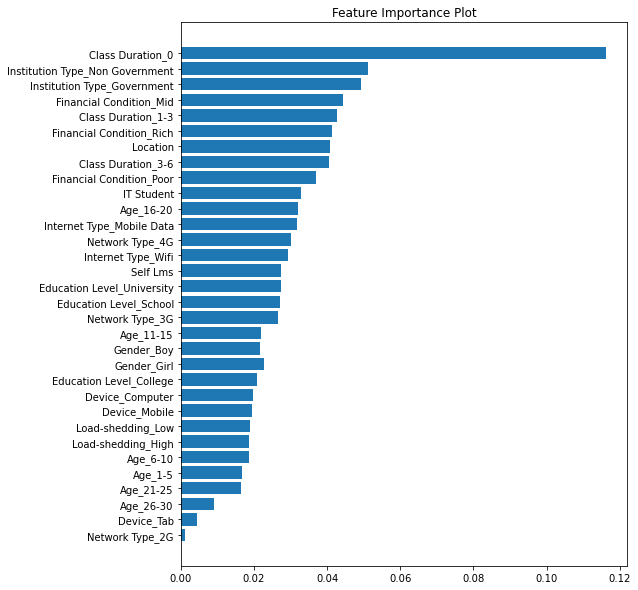

In [83]:
plt.figure(figsize=(8,10))
sorted_index = rfmodel.feature_importances_.argsort()
plt.barh(rfmodel.feature_names_in_[sorted_index],rfmodel.feature_importances_[sorted_index])
plt.title('Feature Importance Plot')
plt.show()

## Save Model

In [52]:
# import pickle to save model
import pickle

pickle.dump(rfmodel, open('Model','wb'))